In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/diamonds.csv')

In [ ]:
display(df.info())
display(df.describe())
display(df.shape)
display(df.head(10))
display(df.tail(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


None

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


(53940, 10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


,carat,cut,color,clarity,depth,table,price,x,y,z
53930,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53931,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53932,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47
53933,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49
53934,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [ ]:
print(df['cut'].unique())
print(df['color'].unique())
print(df['clarity'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


<Axes: xlabel='cut', ylabel='price'>

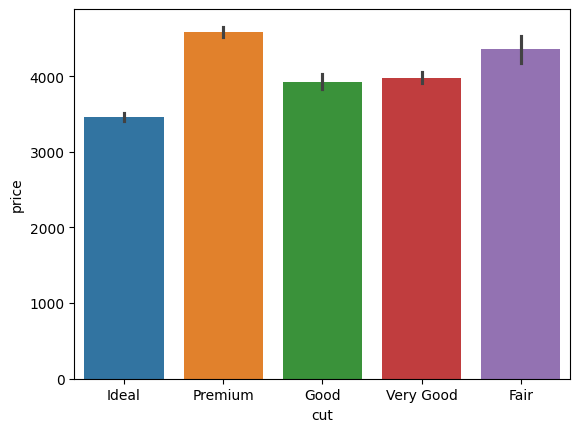

In [ ]:
sns.barplot(data = df, x = 'cut', y = 'price', hue = 'cut')

<Axes: xlabel='clarity', ylabel='price'>

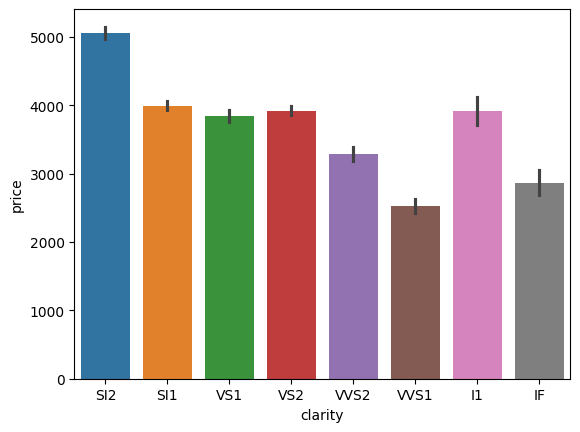

In [ ]:
sns.barplot(data = df, x = 'clarity', y = 'price', hue = 'clarity')

<Axes: xlabel='carat', ylabel='price'>

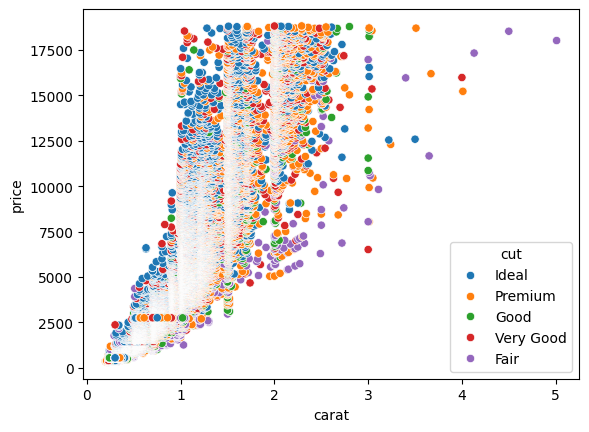

In [ ]:
sns.scatterplot(data = df, x = 'carat', y = 'price', hue = 'cut')

<Axes: xlabel='cut', ylabel='price'>

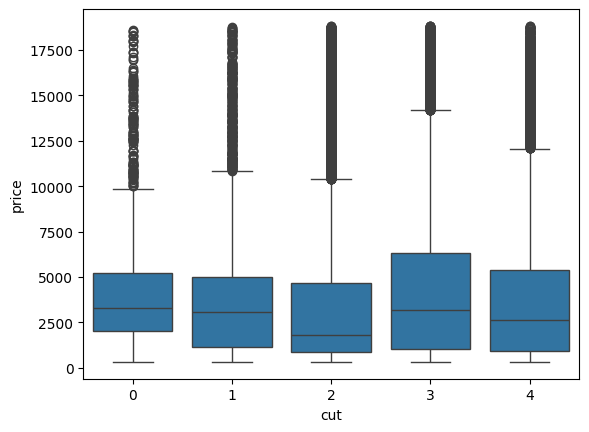

In [ ]:
sns.boxplot(data = df, x = 'cut', y = 'price')

<Axes: xlabel='clarity', ylabel='price'>

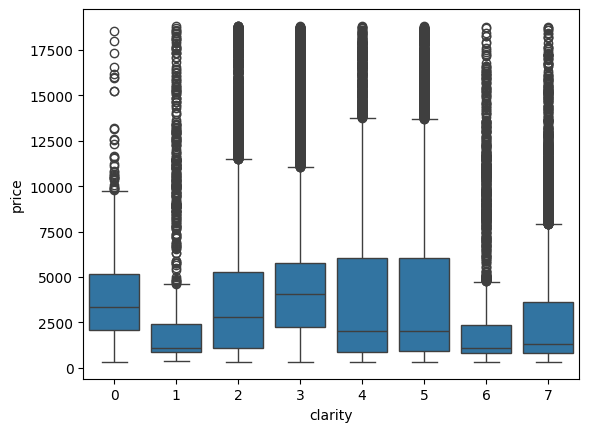

In [ ]:
sns.boxplot(data = df, x = 'clarity', y = 'price')

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['cut'] = le.fit_transform(df['cut'])
df['color'] = le.fit_transform(df['color'])
df['clarity'] = le.fit_transform(df['clarity'])

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis =1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_rf_pred = rf.predict(X_test)

print('RMSE: ', root_mean_squared_error(y_test, y_rf_pred))
print('R2: ', r2_score(y_test, y_rf_pred))

RMSE:  551.3314773917505
R2:  0.9808595525756899
